# Introduction 
The study of two signals, recorded simultaneously in one system, is a very interesting task. In case when the system under consideration is a part of human body and we record signals related to the activity of some organ, it can also provide a diagnostic value. For example – we can analyze EEG signals or signals representing uterine contractions and discover some abnormalities in the organ’s functions. 

To this end we can apply coherence function, which is based on Fourier transform. Word “coherence” is from the Latin word cohaerentia – it means natural or logical connection or consistency. The coherence function allows us to find common frequencies and to evaluate the similarity of signals.

However, it does not give any information about time. There are two often used methods to calculate the coherence function: 
* Welch method
* MVDR (Minimum Variance Distortionless Response) method.

A transformation T is said to be linear if applied to linear combination of signals ax+by gives linear combination of results **aT(x)+bT(y)**. Coherence function is based on Fourier transform, which is a linear transformation. However, the coherence function itself is not linear.

## Coherence function
Coherence function is defined as

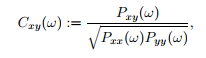


where **Pxx** and **Pyy** are power spectra of signals x and y, **Pxy** is cross-power spectrum for these signals,**ω** is frequency. In case, when **Pxx(ω) = 0** or **Pyy(ω) = 0**, then also **Pxy(ω) = 0** and we assume, that value **Cxy(ω)** is zero.


The power spectrum (also called periodogram) and cross-power spectrum are defined as 

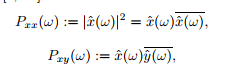

where x is complex conjugate of x and xˆ(ω) is the Fourier transform. It yields the information about frequencies occurring
in signals and the dominant frequency for these signals.

# Measures of Synchronization
In general, measures of phase synchrony are computed from the frequency domain representation of a pair of signals, which represents across a set of observations (epochs or time windows), and for a set of frequency bins, an estimate of the amplitude and the phase of the oscillations. Mathematically, it is convenient to represent these amplitudes and phases combined into complex-valued numbers, **Aeiφ**, or equivalently **x + iy**, which can be geometrically depicted as points in a 2-dimensional Cartesian coordinate system, where the magnitude of the vector connecting the point with the origin reflects the amplitude, and the angle of the vector with the X-axis reflects the phase (see *Figure 2A*; equivalently the x and y coordinates of this number represent the Real and Imaginary parts, respectively). The spectral representation of individual signals is combined to obtain the cross-spectral density (the frequency domain equivalent of the cross-covariance function), by means of frequency-wise multiplication of the spectral representation of one of the signals with the complex conjugate of the spectral representation of the other signal, where complex conjugation is defined as taking the negative of the phase angle. This multiplication results in a complex number, which geometrically depicts a vector in 2-dimensional space, where the magnitude of the vector reflects the product of the two signals' amplitudes, and the angle between the vector and the X-axis reflects the two signals' difference in phase:

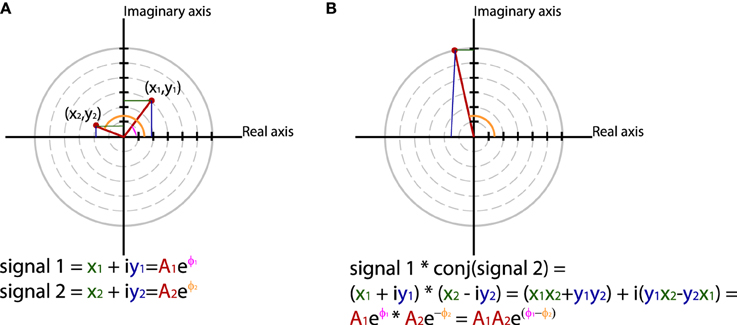

**Using polar coordinates and complex numbers to represent signals in the frequency domain.** *(A) The phase and amplitude of two signals. (B) The cross-spectrum between signal 1 and 2, which corresponds to multiplying the amplitudes of the two signals and subtracting their phases

Measures of phase synchrony now aim to capture some property of the probability distribution of the single observation cross-spectral densities, quantifying the consistency of the distribution of phase differences. One way to combine the cross-spectral densities would be to take a weighted sum, which geometrically amounts to drawing all vectors head to tail, and normalize the end result. The idea is now that if there is some consistency across observations of the phase difference between the two oscillatory signals, the length of the weighted sum will have a non-zero value (because the vectors efficiently add up), whereas it will be close to zero when the individual observations' phase differences are evenly distributed between 0 and 360°. Figure 3 displays three “toy scenarios” to illustrate this concept. Imagine two oscillators that have a consistent zero-degree phase relation over many trials or observation epochs. This is depicted graphically in the time domain in the left panels of Figure 3, showing two signals (oscillation 1 and oscillation 2) that are observed for four trials. The right panels of Figure 3 show the vector sums of the cross-spectral densities. For the time being we assumed the amplitude of the oscillations to have a value of 1. 

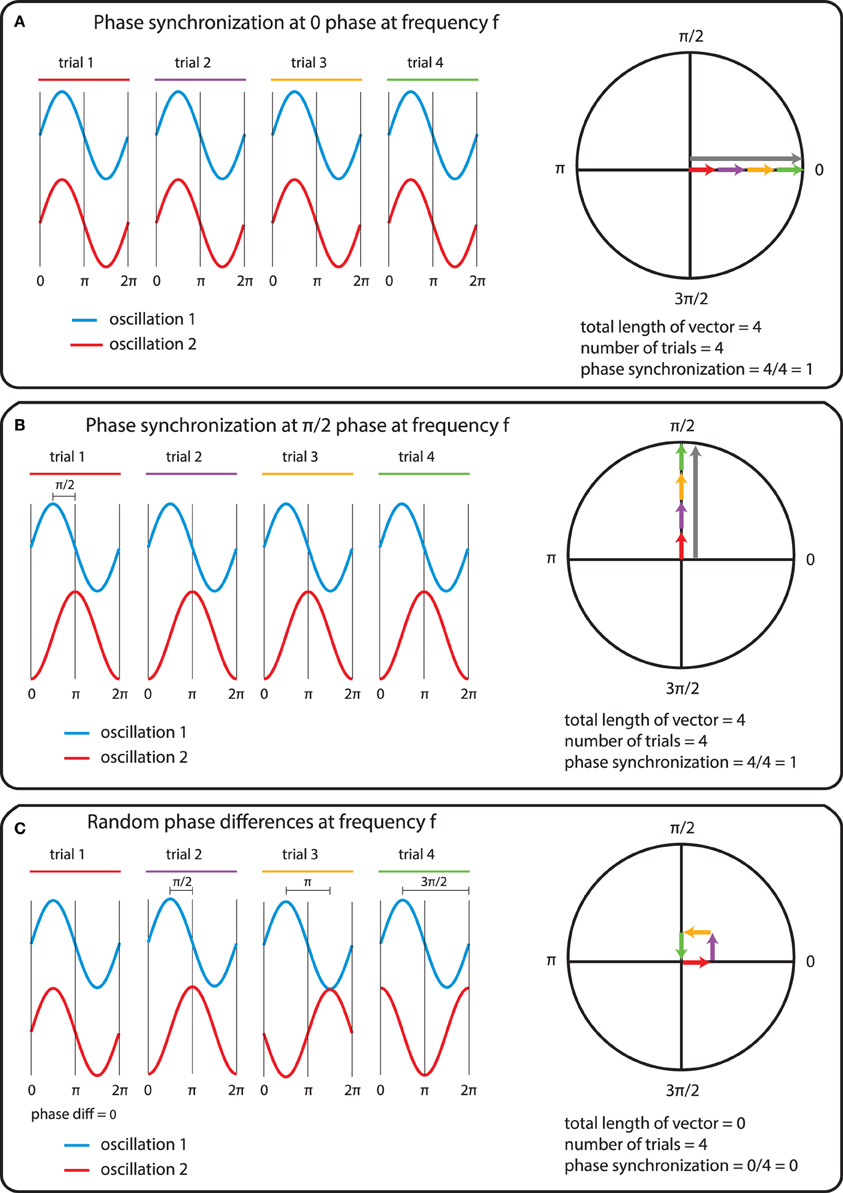

In the first scenario the phase difference is the same (and 0) for each of the observations, yielding a vector sum that has a length of 4. In the second scenario, the phase difference is also consistent across observations (i.e., 90° each time). In the third scenario however, the phase difference is not consistent across observations. In this example, the individual observations' phase differences were 0, 90, 180, and 270° respectively, resulting in individual observation cross-spectral density vectors pointing right, up, left and down. This results in a vector sum that has zero length, which coincides with the fact that there was no consistent phase difference in this case. Note that real data will fall between the two extremes of perfect phase synchronization (vector sum normalized by number of epochs equals 1) and a zero phase synchronization (vector sum to zero), even in the absence of any true phase synchronization due to sample size bias (see the section on sample size bias for an in depth discussion of this issue and how it can be mitigated).


# The Coherence Coefficient
One widely used metric quantifying phase synchrony between a pair of measured signals is the coherence coefficient. Mathematically, the coherence is the frequency domain equivalent to the time domain cross-correlation function. Its squared value quantifies, as a function of frequency, the amount of variance in one of the signals that can be explained by the other signal, or vice-versa, in analogy to the squared correlation coefficient in the time domain. The coherence coefficient is a normalized quantity bounded by 0 and 1, and is computed mathematically as:

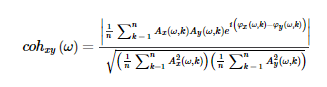

The numerator term represents the length of the vector average of the individual trial cross-spectral densities between signal x and y at frequency ω. The denominator represents the square root of the product of the average of the individual trial power estimates of signals x and y at frequency ω.

It is usually more convenient to represent the averaged cross-spectral density in a single matrix, omitting the complex exponentials in the notation:

    S(ω)=[Sxx(ω) Sxy(ω)
          Syx(ω) Syy(ω)]

The diagonal elements reflect the power estimates of signals x and y, and the off-diagonal elements reflect the averaged cross-spectral density terms. The coherence can then be concisely defined as:

cohxy(ω)=|Sxy(ω)|/(Sxx(ω)Syy(ω))**2

Reference:Bastos André M., Schoffelen Jan-Mathijs. "A Tutorial Review of Functional Connectivity Analysis Methods and Their Interpretational Pitfalls".Frontiers in Systems Neuroscience, VOLUME=9,YEAR=2016, PAGES=175, URL=https://www.frontiersin.org/article/10.3389/fnsys.2015.00175, DOI=10.3389/fnsys.2015.00175  


In [7]:
#Script for calculating coherence between two signals:

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Simulated signals example 1

fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

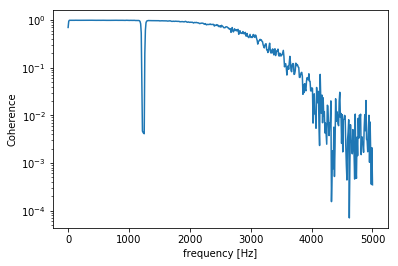

In [9]:
#Plotting example 1
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()


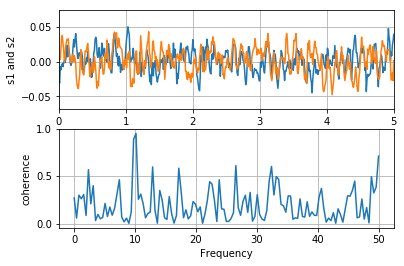

In [10]:
# simulated signals example 2

plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence')
plt.show()